<a href="https://colab.research.google.com/github/Lightola/light-wprk/blob/main/8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**project 8 IMDb Top 1000 dataset**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [8]:
#load dataset
imdb_df = pd.read_csv("/content/imdb_top_1000.csv")

In [9]:
#Data Cleaning
imdb_df.drop(columns=['Poster_Link', 'Overview'], inplace=True)

def clean_runtime(runtime):
  if isinstance(runtime, str):
    return int(runtime.replace(" min", ""))
  return np.nan

imdb_df['Runtime'] = imdb_df['Runtime'].apply(clean_runtime)
imdb_df['Released_Year'] = pd.to_numeric(imdb_df['Released_Year'], errors='coerce')
imdb_df['Gross'] = imdb_df['Gross'].str.replace(',', '').astype(float)


In [10]:
print(imdb_df.head())

               Series_Title  Released_Year  ... No_of_Votes        Gross
0  The Shawshank Redemption         1994.0  ...     2343110   28341469.0
1             The Godfather         1972.0  ...     1620367  134966411.0
2           The Dark Knight         2008.0  ...     2303232  534858444.0
3    The Godfather: Part II         1974.0  ...     1129952   57300000.0
4              12 Angry Men         1957.0  ...      689845    4360000.0

[5 rows x 14 columns]


In [11]:
#Handle missing values
imdb_df['Certificate'] = imdb_df['Certificate'].fillna('Unknown')
imdb_df['Meta_score'] = imdb_df['Meta_score'].fillna(imdb_df['Meta_score'].median())
imdb_df['Gross'] = imdb_df['Gross'].fillna(imdb_df['Gross'].median())


In [12]:
#Encode categorical variables
label_cols = ['Certificate', 'Genre', 'Director', 'Star1']
label_encoders = {}
for col in label_cols:
  le = LabelEncoder()
  imdb_df[col] = le.fit_transform(imdb_df[col])
  label_encoders[col] = le


In [13]:
#Select features and target
features = ['Certificate', 'Released_Year', 'Runtime', 'Genre', 'Meta_score', 'Director', 'Star1', 'No_of_Votes', 'Gross']
target = 'IMDB_Rating'

X = imdb_df[features]
y = imdb_df[target]

#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
#Model training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
#Evaluation
preds = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print(f"RMSE: {rmse:.2f}")

RMSE: 0.19


In [16]:
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]
#keep same indices
X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]

In [17]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)
#Evaluation
preds = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print(f"RMSE: {rmse:.2f}")


RMSE: 0.21


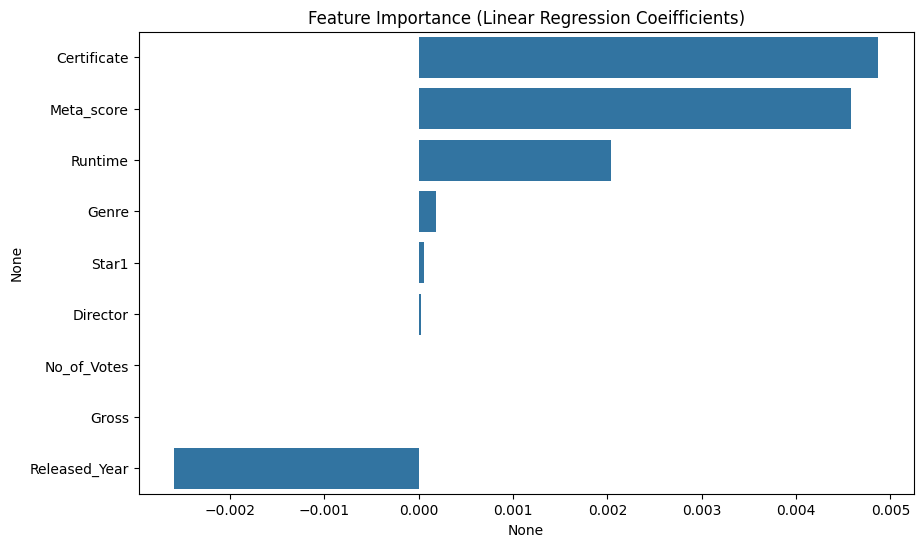


Top 5 most important features influencing IMDb ratings:
Certificate    0.004873
Meta_score     0.004587
Runtime        0.002042
Genre          0.000179
Star1          0.000055
dtype: float64


In [20]:
#Feature Importance
importances = pd.Series(model.coef_,index=features).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=importances.index)
plt.title("Feature Importance (Linear Regression Coeifficients)")
plt.show()

#Insights
print("\nTop 5 most important features influencing IMDb ratings:")
print(importances.head())